<a href="https://colab.research.google.com/github/davidofitaly/05_decision_tree_regression_projects/blob/main/01_raw_data_analysis_using_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data generation](#1)
3. [Linear Regression](#2)
4. [Linear model of the four degree](#3)
5. [Regression of decision trees](#4)
6. [Grid Search](#5)



### <a name='0'></a> Import of libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)
np.random.seed(42)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'></a> Data generation

In [2]:
# Import function to generate synthetic regression datasets
from sklearn.datasets import make_regression

# Generate synthetic data for regression
data, target = make_regression(n_samples=200, n_features=1, noise=20)

# Cube the target values to introduce non-linearity
target = target ** 2

print(f"{data[:5]}")
print(f"{target[:5]}")

[[ 1.8523]
 [ 0.4736]
 [-1.2309]
 [ 0.6257]
 [-0.072 ]]
[18795.4404  3481.3017  5866.346   3697.1165    78.9649]


### <a name='2'></a> Linear Regression

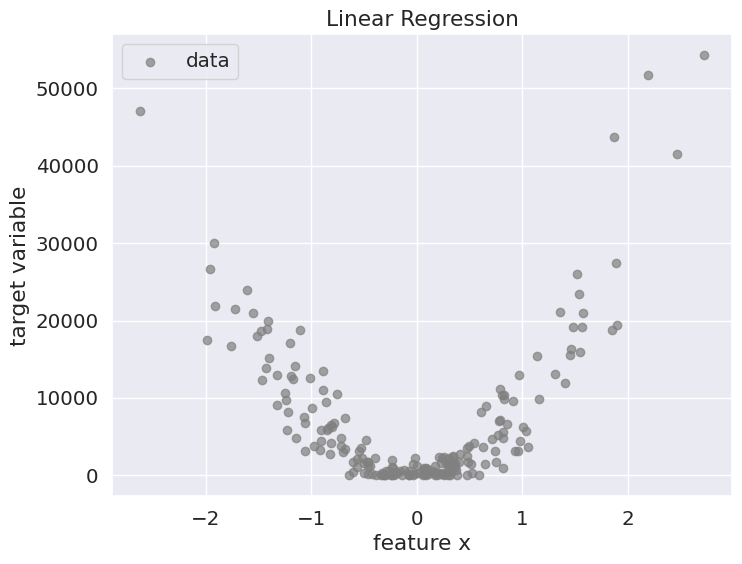

In [3]:
# Create and display scatter plot for generated data
plt.figure(figsize=(8,6))
plt.title('Linear Regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(data, target, label='data', color='grey', alpha=0.7)
plt.legend()

In [4]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 1)
X_test shape: (40, 1)
y_train shape: (160,)
y_test shape: (40,)


In [5]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

intercept_linear = regressor_linear.intercept_
coef_linear = regressor_linear.coef_[0]

print(regressor_linear.score(X_test, y_test))

-0.08437071943767505


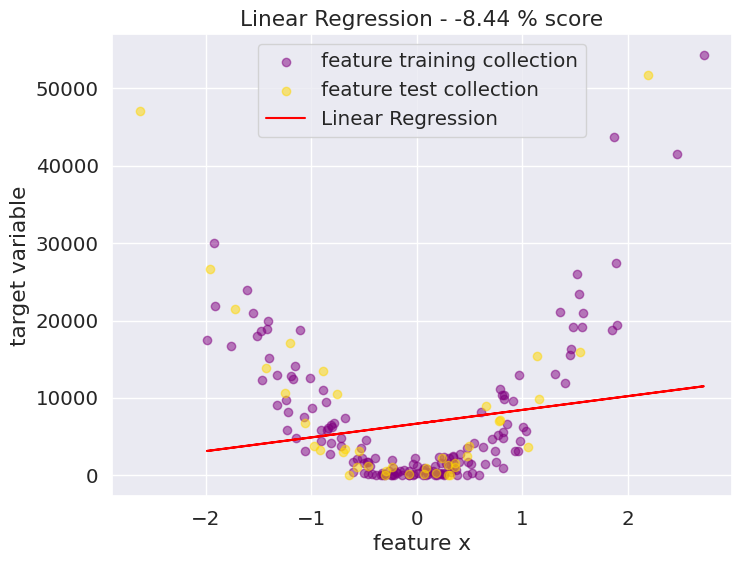

In [47]:
# Plot training and test datasets with a polynomial regression line of degree 1
plt.figure(figsize=(8,6))
plt.title(f'Linear Regression - {regressor_linear.score(X_test, y_test)* 100:.2f} % score')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_linear + coef_linear * X_train, color='red', label='Linear Regression')
plt.plot()
plt.legend()


###  <a name='3'></a> Linear model of the four degree

In [7]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 1)
X_test shape: (40, 1)
y_train shape: (160,)
y_test shape: (40,)


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the LinearRegression class
poly = PolynomialFeatures(degree=4)


X_train_poly_4 = poly.fit_transform(X_train)
X_test_poly_4 = poly.transform(X_test)

In [9]:
X_train_poly_4[:10]

array([[ 1.    ,  0.0675,  0.0046,  0.0003,  0.    ],
       [ 1.    ,  1.538 ,  2.3656,  3.6383,  5.5959],
       [ 1.    , -0.9905,  0.9812, -0.9719,  0.9627],
       [ 1.    , -0.0728,  0.0053, -0.0004,  0.    ],
       [ 1.    , -0.1613,  0.026 , -0.0042,  0.0007],
       [ 1.    ,  0.2323,  0.0539,  0.0125,  0.0029],
       [ 1.    ,  1.8658,  3.4811,  6.495 , 12.1182],
       [ 1.    , -1.4123,  1.9946, -2.817 ,  3.9784],
       [ 1.    ,  0.0582,  0.0034,  0.0002,  0.    ],
       [ 1.    , -0.1383,  0.0191, -0.0026,  0.0004]])

In [10]:
X_test_poly_4[:10]

array([[ 1.    ,  0.7818,  0.6112,  0.4779,  0.3736],
       [ 1.    ,  0.297 ,  0.0882,  0.0262,  0.0078],
       [ 1.    , -1.4247,  2.0299, -2.8921,  4.1205],
       [ 1.    ,  0.0686,  0.0047,  0.0003,  0.    ],
       [ 1.    , -0.9194,  0.8453, -0.7772,  0.7146],
       [ 1.    ,  0.791 ,  0.6257,  0.495 ,  0.3915],
       [ 1.    , -0.3011,  0.0907, -0.0273,  0.0082],
       [ 1.    , -0.2917,  0.0851, -0.0248,  0.0072],
       [ 1.    , -1.9597,  3.8403, -7.5257, 14.748 ],
       [ 1.    , -1.2457,  1.5519, -1.9332,  2.4083]])

In [11]:
regressor_4 = LinearRegression()
regressor_4.fit(X_train_poly_4, y_train)

print(regressor_4.score(X_test_poly_4, y_test))

0.8608396701077159


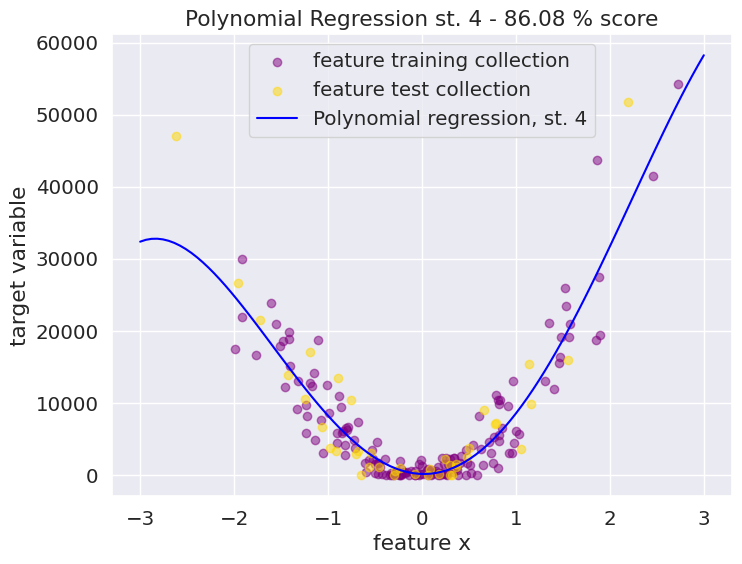

In [12]:
X_range_4 = np.linspace(-3, 3, 100).reshape(-1, 1) # Generate 100 evenly spaced values between -10 and 10 for plotting
X_range_poly_4 = poly.transform(X_range_4) # Transform the generated values into polynomial features
y_range_pred_4 = regressor_4.predict(X_range_poly_4) # Predict the target values using the trained polynomial regression model


# Plot training and test datasets with a polynomial regression line of degree 4
plt.figure(figsize=(8,6))
plt.title(f'Polynomial Regression st. 4 - {regressor_4.score(X_test_poly_4, y_test)* 100:.2f} % score')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_range_4, y_range_pred_4, color='blue', label='Polynomial regression, st. 4')
plt.plot()
plt.legend()

### <a name='4'></a> Regression of decision trees + Decision tree graph

In [13]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 1)
X_test shape: (40, 1)
y_train shape: (160,)
y_test shape: (40,)


In [17]:
from sklearn.tree import DecisionTreeRegressor

# Initialize a Decision Tree regressor and fit it to the training data.
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(X_train, y_train)



DecisionTreeRegressor()

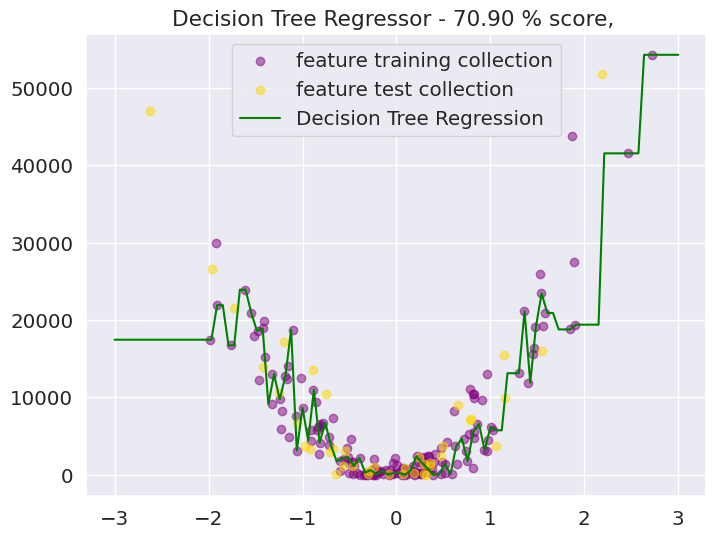

In [16]:
# Generate a grid of values from -3 to 3 and predict the output using the trained regressor
X_grid = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred_grid = regressor_tree.predict(X_grid)

# Create a plot to visualize the training and test data alongside the decision tree's predictions
plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

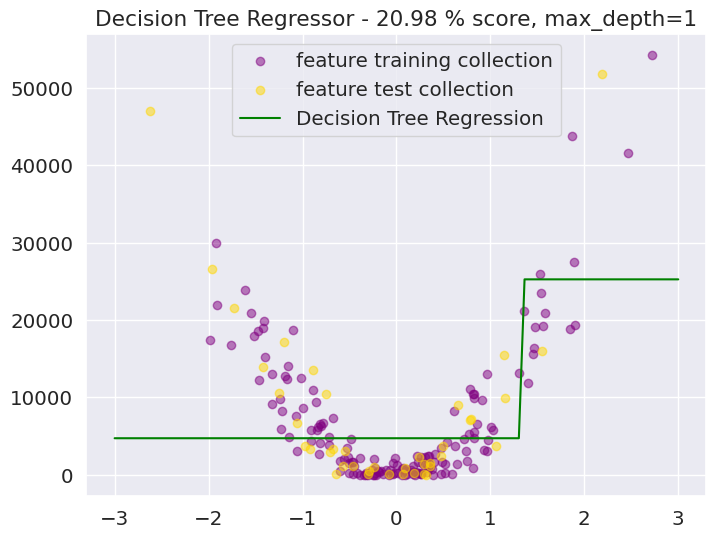

In [21]:
# Set the maximum depth of the decision tree to 1
max_depth = 1

# Create an instance of the DecisionTreeRegressor with the specified maximum depth
regressor_tree = DecisionTreeRegressor(max_depth=max_depth)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)


# Create a plot to visualize the training and test data alongside the decision tree's predictions
plt.figure(figsize=(8, 6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test) * 100:.2f} % score, max_depth={max_depth}')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()


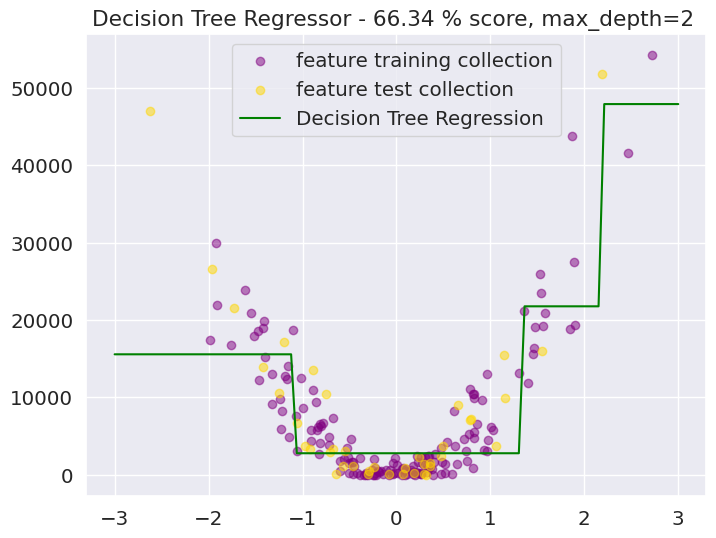

In [22]:
# Set the maximum depth of the decision tree to 2
max_depth = 2

regressor_tree = DecisionTreeRegressor(max_depth = max_depth)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)

# Create a plot to visualize the training and test data alongside the decision tree's predictions
plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth} ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

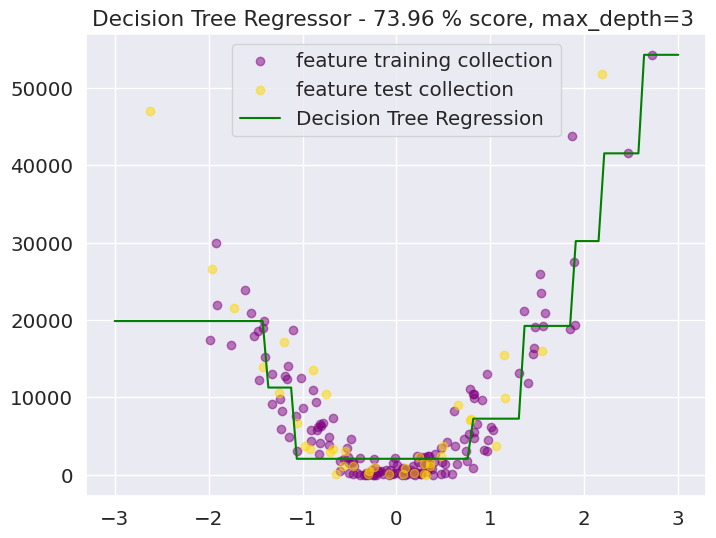

In [24]:
# Set the maximum depth of the decision tree to 3
max_depth = 3

regressor_tree = DecisionTreeRegressor(max_depth = max_depth)
regressor_tree.fit(X_train, y_train)
y_pred_grid = regressor_tree.predict(X_grid)

# Create a plot to visualize the training and test data alongside the decision tree's predictions
plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth} ')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')
plt.legend()
plt.show()

In [46]:
# Import necessary libraries for visualizing the decision tree
from sklearn.tree import export_graphviz
import six
from io import StringIO
from IPython.display import Image
import pydotplus

# Function to create and visualize a Decision Tree Regressor
def make_dt_regression(max_depth=1):
    # Initialize and fit the Decision Tree Regressor
    regressor_tree = DecisionTreeRegressor(max_depth=max_depth)
    regressor_tree.fit(X_train, y_train)

    # Predict values for the grid of input features
    y_pred_grid = regressor_tree.predict(X_grid)

    # Set up the plot for training and test data along with predictions
    plt.figure(figsize=(8, 6))
    plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test) * 100:.2f} % score, max_depth={max_depth}')
    plt.scatter(X_train, y_train, label='Training data', color='purple', alpha=0.5)
    plt.scatter(X_test, y_test, label='Test data', color='gold', alpha=0.5)
    plt.plot(X_grid, y_pred_grid, color='green', label='Predictions')

    # Export the decision tree visualization
    dot_data = StringIO()
    export_graphviz(regressor_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # Return the image of the decision tree
    return Image(graph.create_png(), width=500 + max_depth * 200)


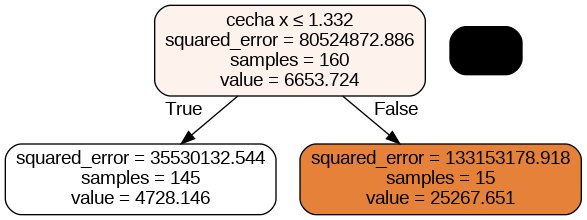

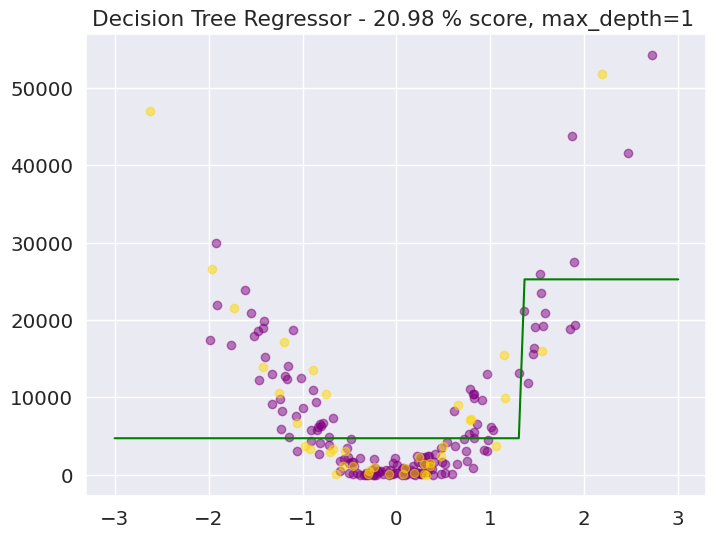

In [34]:
make_dt_regression(max_depth=1)

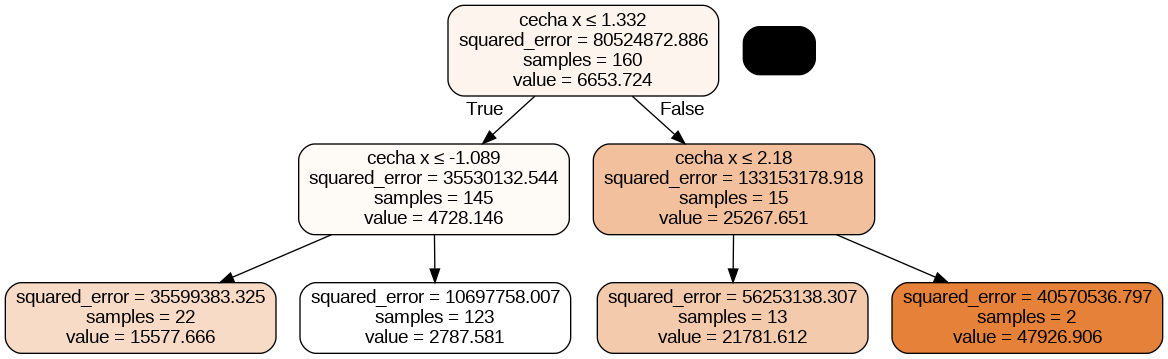

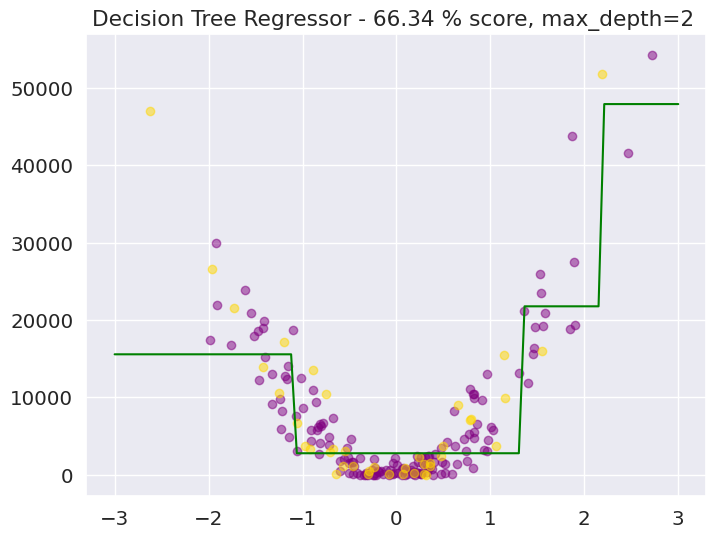

In [35]:
make_dt_regression(max_depth=2)

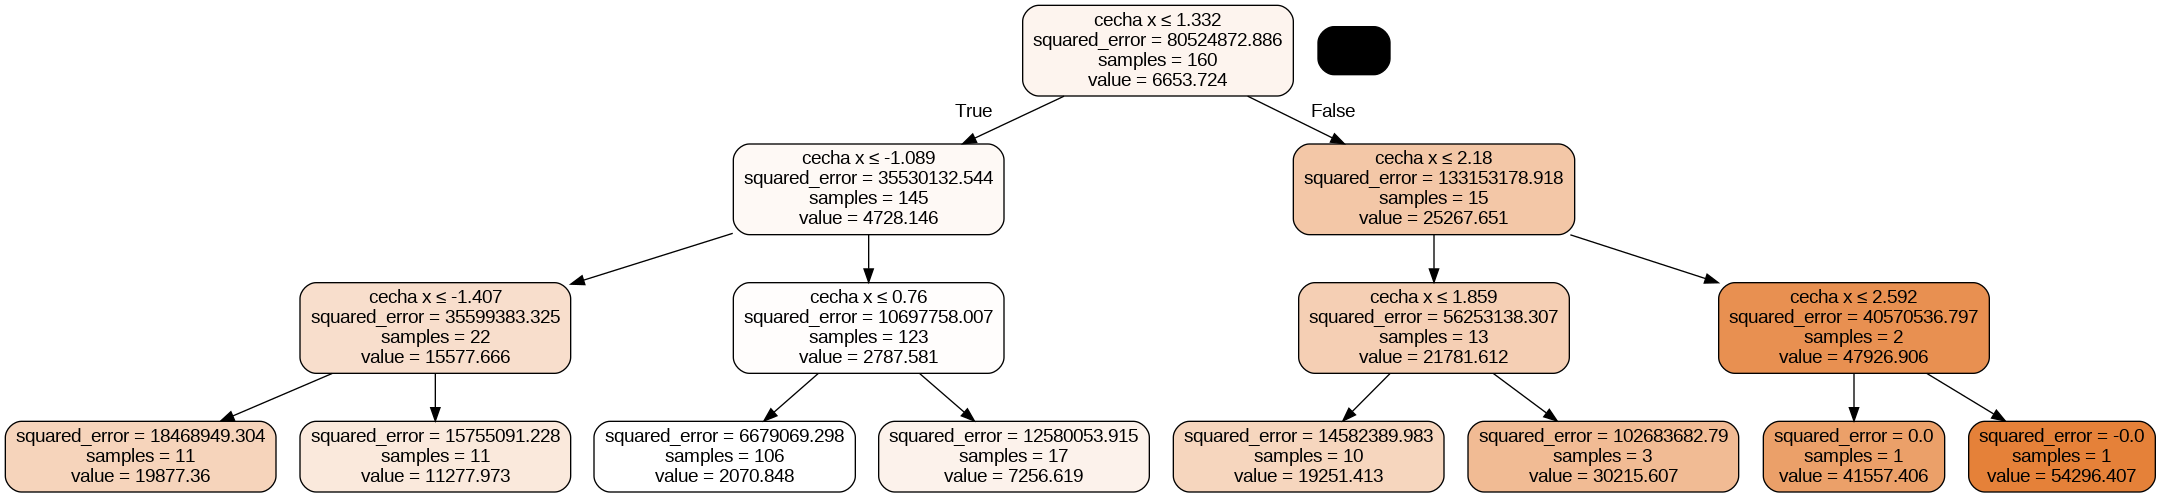

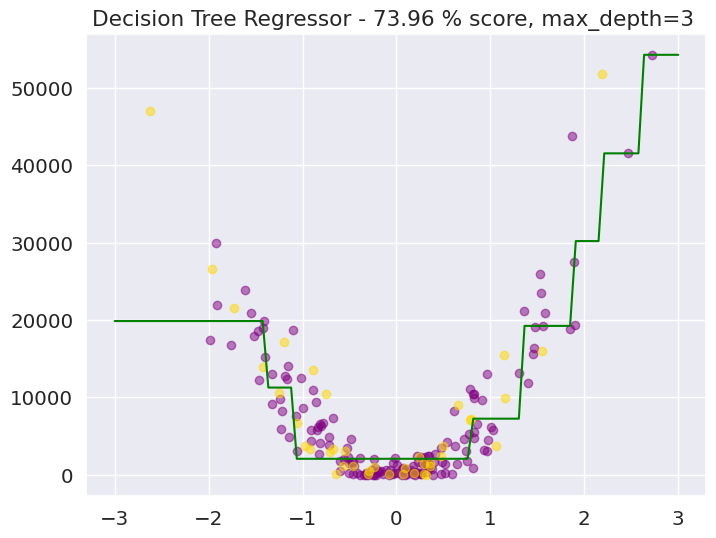

In [36]:
make_dt_regression(max_depth=3)

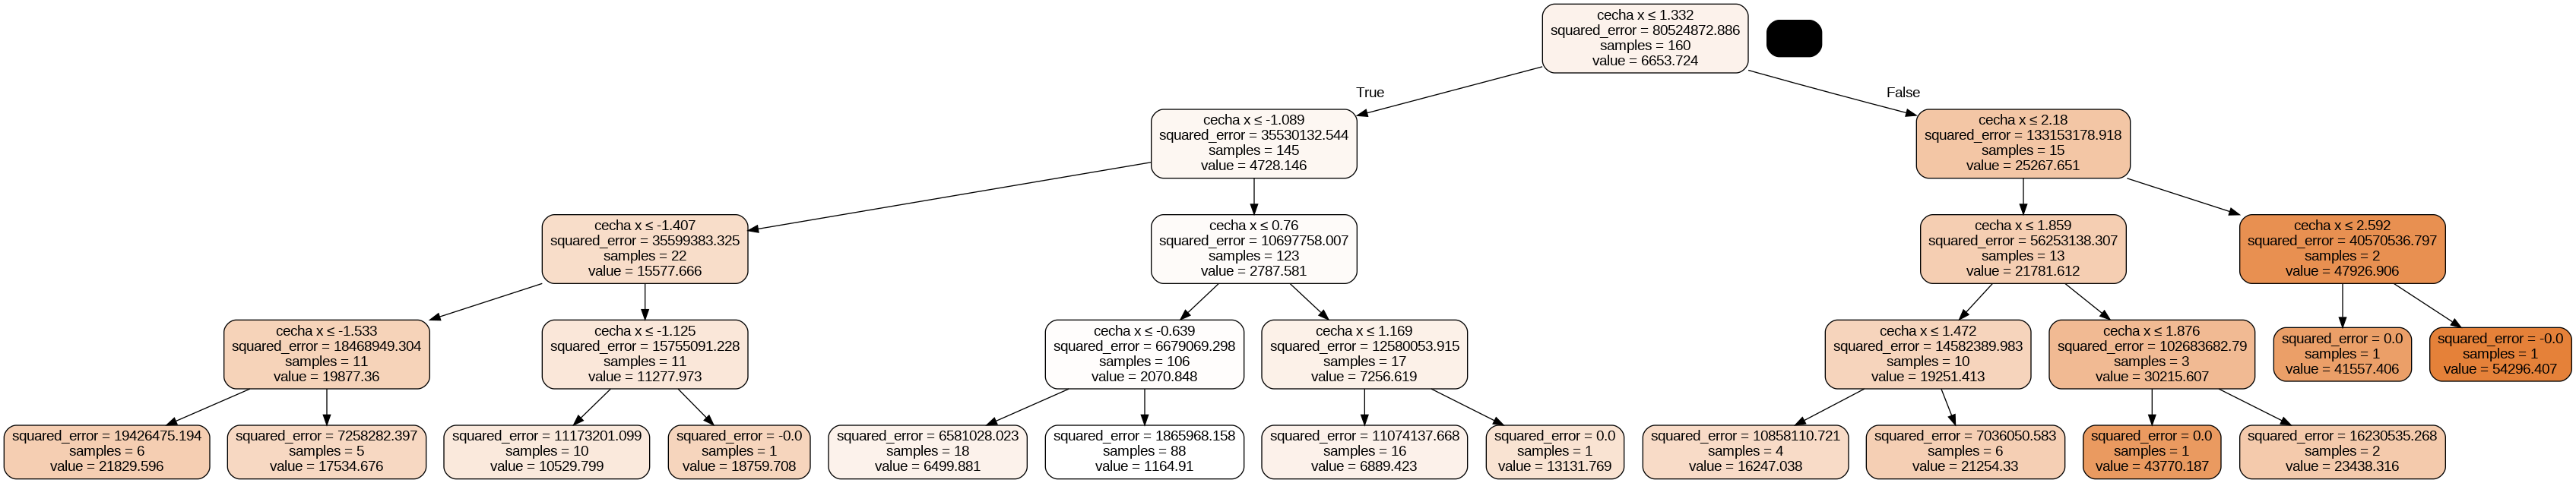

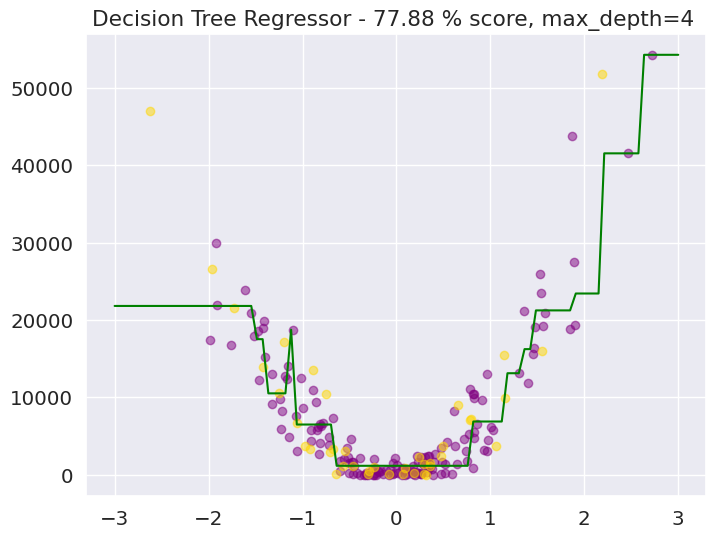

In [37]:
make_dt_regression(max_depth=4)

### <a name='5'></a> Grid Search

In [38]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

# Split datasets into training and testing sets with 20% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 1)
X_test shape: (40, 1)
y_train shape: (160,)
y_test shape: (40,)


In [39]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Different maximum depths for the decision tree
    'min_samples_split': [2, 5, 10, 15],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4, 5],              # Minimum number of samples required to be at a leaf node
}

# Create an instance of the DecisionTreeRegressor
params = DecisionTreeRegressor()

# Set up GridSearchCV with the estimator, parameter grid, scoring method, cross-validation folds, verbosity, and number of jobs
grid_search = GridSearchCV(estimator=params,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative mean squared error for scoring
                           cv=5,                                # 5-fold cross-validation
                           verbose=1,                           # Verbosity level for logging
                           n_jobs=1)                            # Number of jobs to run in parallel (1 for serial)

# Fit the GridSearchCV object to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 220 candidates, totalling 1100 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_squared_error', verbose=1)

- Best params

In [40]:
# Retrieve the best hyperparameters found by the GridSearchCV
best_params = grid_search.best_params_

# Display the best hyperparameters
best_params

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}

- Decision tree model - with the best parameters

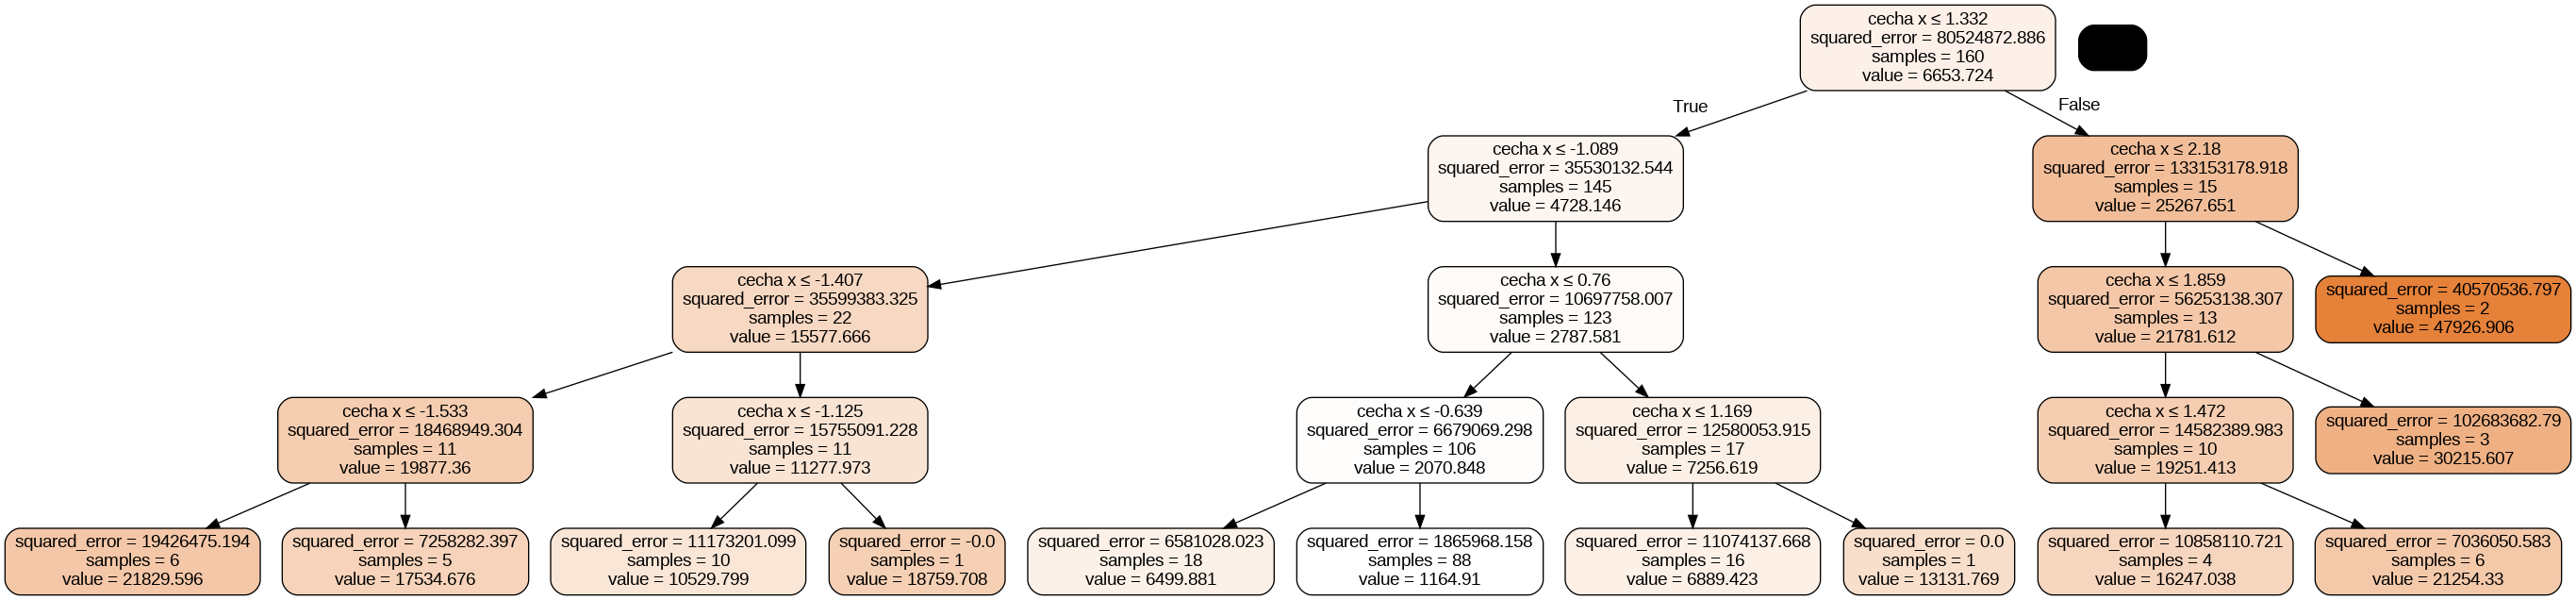

In [44]:
# Create an instance of the DecisionTreeRegressor using the best hyperparameters from GridSearchCV
regressor_tree = DecisionTreeRegressor(**best_params)

# Fit the Decision Tree Regressor to the training data
regressor_tree.fit(X_train, y_train)

# Predict the target values for the grid of input values (X_grid)
y_pred_grid = regressor_tree.predict(X_grid)

# Prepare to visualize the decision tree
dot_data = StringIO()  # Create a StringIO object to hold the DOT representation of the tree
export_graphviz(regressor_tree, out_file=dot_data,  # Export the decision tree to DOT format
                filled=True, rounded=True,          # Fill nodes and round corners for better visualization
                special_characters=True,            # Use special characters for better representation
                feature_names=['cecha x'])         # Specify the feature names for the nodes

# Create a graph from the DOT data and save it as a PNG image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')  # Save the tree as a PNG file

# Display the decision tree image with a specified width
Image(graph.create_png(), width=1400)




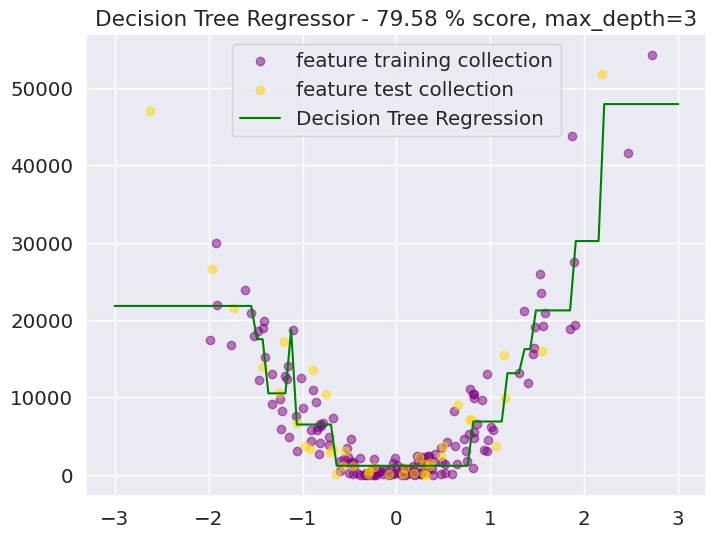

In [45]:
# Plot the training and test data along with the decision tree regression predictions
plt.figure(figsize=(8,6))
plt.title(f'Decision Tree Regressor - {regressor_tree.score(X_test, y_test)* 100:.2f} % score, max_depth={max_depth}')
plt.scatter(X_train, y_train, label='feature training collection', color='purple', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_grid, y_pred_grid, color='green', label='Decision Tree Regression')

plt.legend()
plt.show()
